## K-Means Clustering Example

Let's make some fake data that includes people clustered by income and age, randomly:

In [30]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
import numpy as np
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt

In [57]:
df = pd.read_csv('/Users/richardwestbrook/Library/Mobile Documents/com~apple~CloudDocs/Learning/Projects/spotify_music.csv', header=0)
df = df.dropna()
df = df[df['year'] == 1987]

In [58]:
k_means_df = df[['energy','liveness']]
k_means_df = k_means_df.to_numpy()

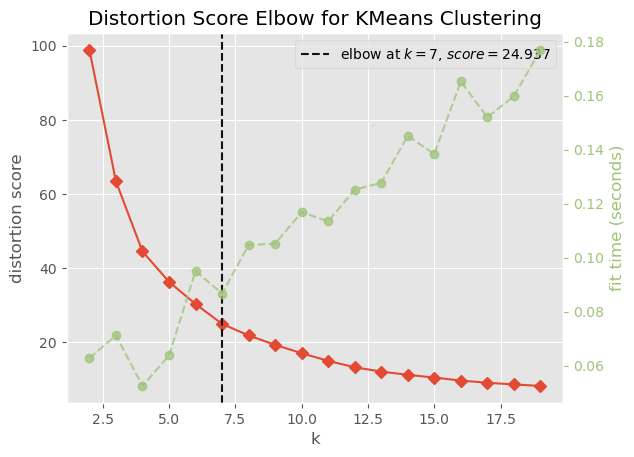

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [59]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,20), timings= True)
visualizer.fit(k_means_df)
visualizer.show()

In [60]:
model = KMeans(n_clusters=7)
model = model.fit(scale(k_means_df))

In [61]:
label = model.fit_predict(k_means_df)
u_labels = np.unique(label)

In [62]:
centroids = model.cluster_centers_
u_labels = np.unique(label)

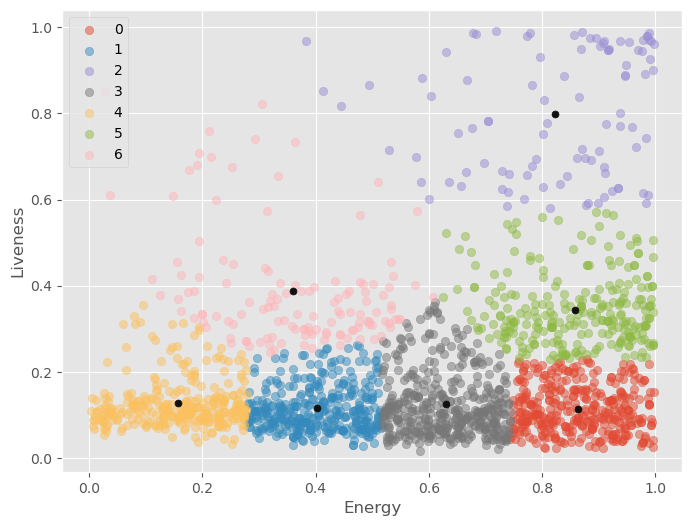

In [65]:
#plotting the results:
plt.style.use('ggplot')

plt.figure(figsize=(8, 6))
 
for i in u_labels:
    plt.scatter(k_means_df[label == i , 0] , k_means_df[label == i , 1] , label = i, alpha = 0.5)
plt.legend()
plt.xlabel('Energy')
plt.ylabel('Liveness')
plt.scatter(centroids[:,0] , centroids[:,1] , s = 25, color = 'k')

In [64]:
cluster_number = pd.DataFrame(model.labels_).set_index(df.index)
df['cluster_number'] = cluster_number
df[['name','artists','cluster_number']]

,name,artists,cluster_number
13006,I Wanna Dance with Somebody (Who Loves Me),['Whitney Houston'],0
13007,Sweet Child O' Mine,"[""Guns N' Roses""]",0
13008,Welcome To The Jungle,"[""Guns N' Roses""]",5
13009,Paradise City,"[""Guns N' Roses""]",0
13010,Everywhere - 2017 Remaster,['Fleetwood Mac'],1
...,...,...,...
164098,24 Hrs. Ago,['Savatage'],0
164099,Reckless Life - Live,"[""Guns N' Roses""]",2
164100,Skinny Sweaty Man,['Red Hot Chili Peppers'],0
164101,Lovers Game,['Chris Isaak'],1
